<a href="https://colab.research.google.com/github/Retajyasse/image-processing/blob/main/image%20processing%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

SUPPORTED_FORMATS = ['.jpg', '.png', '.tif']

def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(8,6))
    if len(image.shape) == 2 or cmap is not None:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

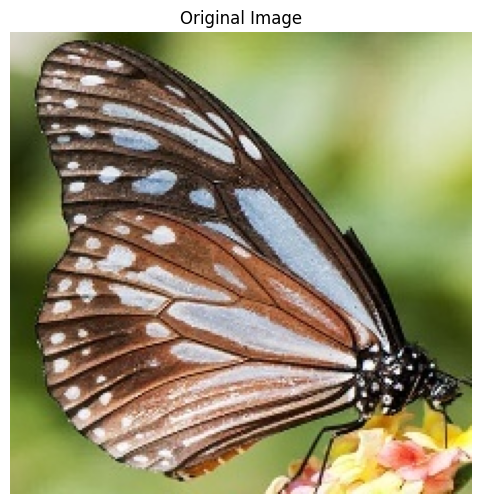

In [ ]:
def load_image(path):
    if not os.path.isfile(path):
        raise FileNotFoundError(f"File not found: {path}")
    ext = os.path.splitext(path)[1].lower()
    if ext not in SUPPORTED_FORMATS:
        raise ValueError(f"Unsupported file type: {ext}. Supported formats: {SUPPORTED_FORMATS}")
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Failed to load image (may be corrupted): {path}")
    return img

# Provide your image path here
image_path = '/content/sample_data/Image_1009.jpg'  # Replace with your uploaded image filename

try:
    img = load_image(image_path)
    display_image(img, "Original Image")
except Exception as e:
    print(f"Error loading image: {e}")

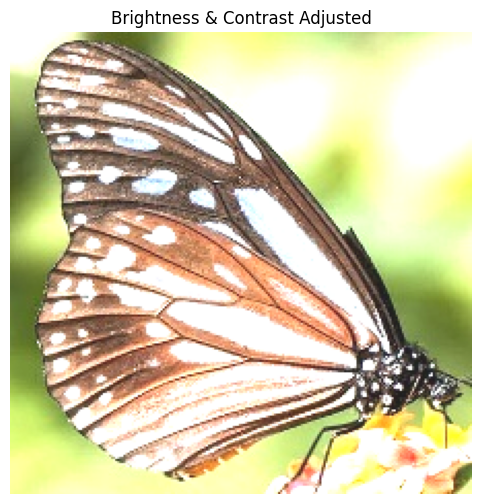

In [ ]:
def adjust_brightness_contrast(image, brightness=0, contrast=0):
    alpha = 1 + (contrast / 100.0)
    beta = brightness
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

img_adj = adjust_brightness_contrast(img, brightness=30, contrast=40)
display_image(img_adj, "Brightness & Contrast Adjusted")


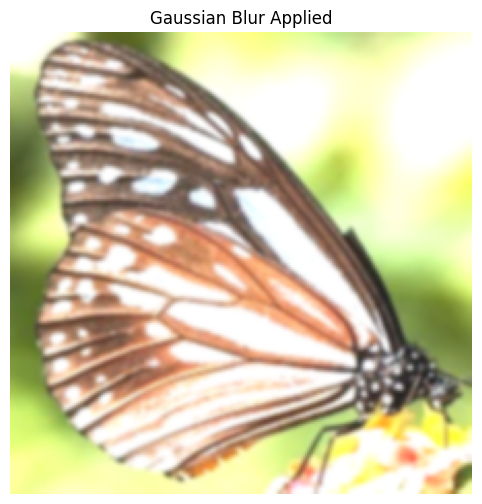

In [ ]:
def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

img_blur = apply_gaussian_blur(img_adj)
display_image(img_blur, "Gaussian Blur Applied")


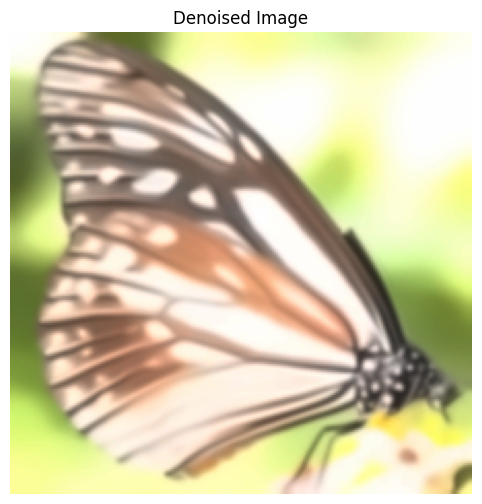

In [ ]:
def apply_denoising(image, h=10, template_window=7, search_window=21):
    return cv2.fastNlMeansDenoisingColored(image, None, h, h, template_window, search_window)

img_denoised = apply_denoising(img_blur)
display_image(img_denoised, "Denoised Image")


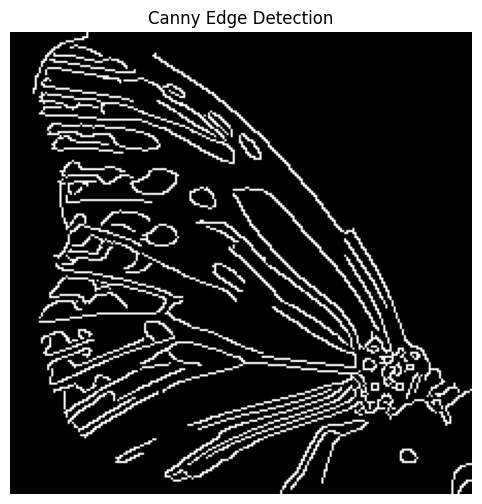

In [ ]:
def apply_canny_edge_detection(image, lower_thresh=100, upper_thresh=200):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, lower_thresh, upper_thresh)
    return edges

edges = apply_canny_edge_detection(img_denoised)
display_image(edges, "Canny Edge Detection", cmap='gray')


Extracted 361 keypoints


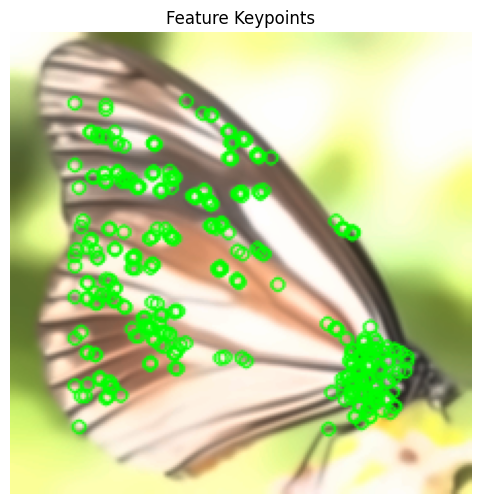

In [ ]:
def extract_features(image):
    orb = cv2.ORB_create()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    return keypoints, descriptors

keypoints, descriptors = extract_features(img_denoised)
print(f"Extracted {len(keypoints)} keypoints")

img_features = cv2.drawKeypoints(img_denoised, keypoints, None, color=(0,255,0))
display_image(img_features, "Feature Keypoints")


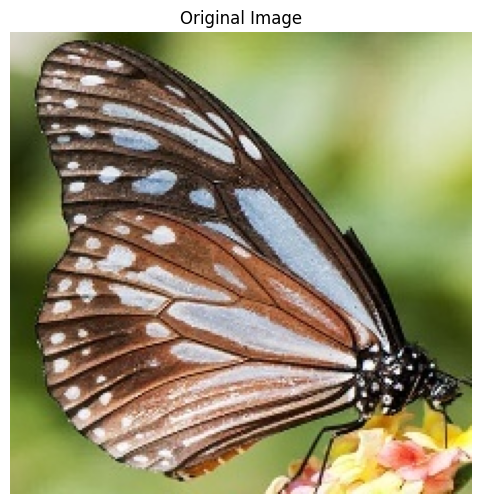

Saved image: outputs/Image_1009_original.jpg


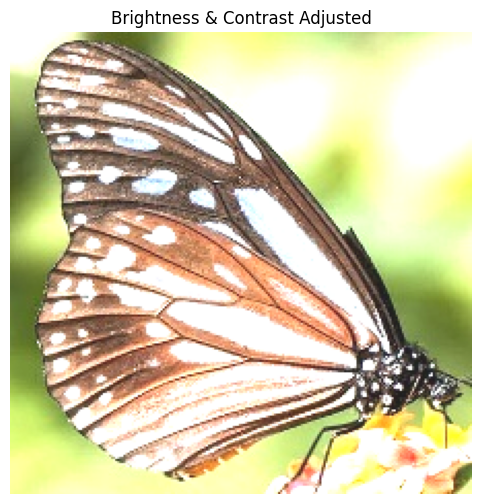

Saved image: outputs/Image_1009_adjusted.jpg


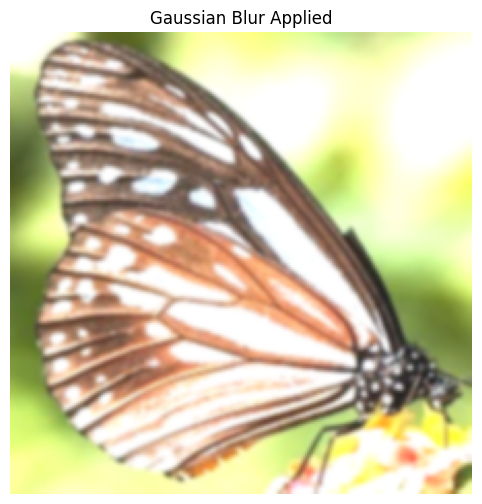

Saved image: outputs/Image_1009_blurred.jpg


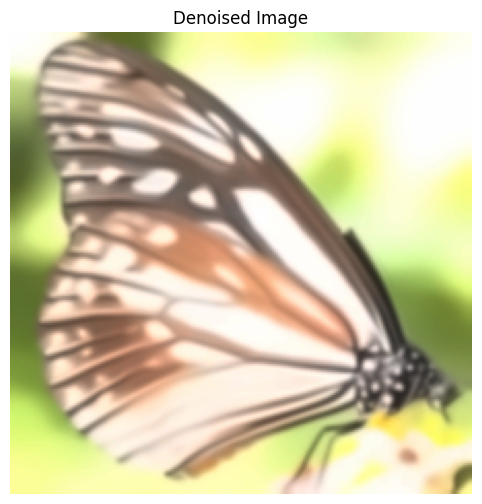

Saved image: outputs/Image_1009_denoised.jpg


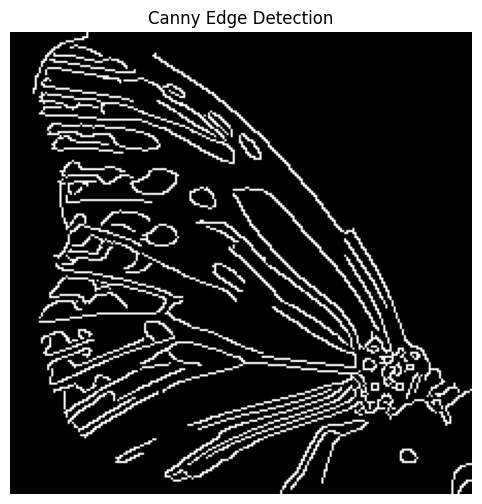

Saved image: outputs/Image_1009_edges.jpg
[INFO] Extracted 361 keypoints


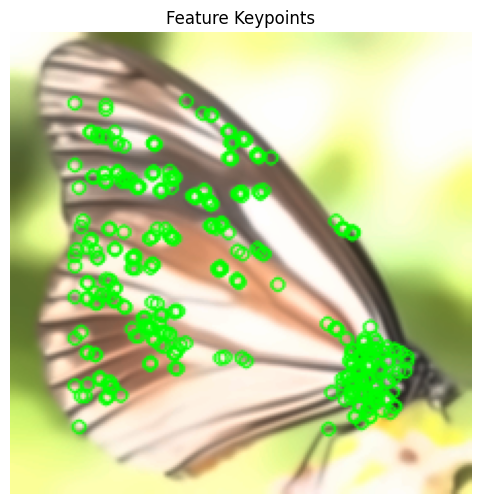

Saved image: outputs/Image_1009_features.jpg
[INFO] Processing pipeline complete.


In [ ]:
# Set your image path here
image_path = '/content/Image_1009.jpg'  # Change to your uploaded file name

# Run the entire pipeline
main(image_path)

def main(image_path):
    """
    Full image processing pipeline:
    - Load image (with validation)
    - Adjust brightness & contrast
    - Apply Gaussian blur
    - Apply denoising
    - Detect edges with Canny
    - Extract ORB features and draw keypoints
    - Save all intermediate and final outputs
    - Display each step's output

    Args:
        image_path (str): Path to the input image file.
    """
    try:
        img = load_image(image_path)
        display_image(img, "Original Image")
        save_image(img, image_path, "original")
    except Exception as e:
        print(f"[ERROR] {e}")
        return

    img_adj = adjust_brightness_contrast(img, brightness=30, contrast=40)
    display_image(img_adj, "Brightness & Contrast Adjusted")
    save_image(img_adj, image_path, "adjusted")

    img_blur = apply_gaussian_blur(img_adj)
    display_image(img_blur, "Gaussian Blur Applied")
    save_image(img_blur, image_path, "blurred")

    img_denoised = apply_denoising(img_blur)
    display_image(img_denoised, "Denoised Image")
    save_image(img_denoised, image_path, "denoised")

    edges = apply_canny_edge_detection(img_denoised)
    display_image(edges, "Canny Edge Detection", cmap='gray')
    save_image(edges, image_path, "edges")

    keypoints, descriptors = extract_features(img_denoised)
    print(f"[INFO] Extracted {len(keypoints)} keypoints")
    img_features = cv2.drawKeypoints(img_denoised, keypoints, None, color=(0,255,0))
    display_image(img_features, "Feature Keypoints")
    save_image(img_features, image_path, "features")

    print("[INFO] Processing pipeline complete.")
